# UCI Heart Disease

In [7]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Unzip the file
zip_file_path = 'UCI Heart Disease Data.zip'  # Ensure this path is correct
extracted_folder = 'heart_disease_data'  # Folder where the file will be extracted

# Extract the files from the zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)  # Extract to the folder

# Step 2: Load the heart disease CSV into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'heart_disease_data.csv')  # Corrected file name
df = pd.read_csv(csv_file_name)

# Display the first few rows of the dataset to verify it's loaded correctly
print(df.head())

# Display general information about the dataset
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   48    1   0       130   256    1        0      150      1      0.0      2   
1   61    1   0       148   203    0        1      161      0      0.0      2   
2   44    0   2       118   242    0        1      149      0      0.3      1   
3   47    1   0       110   275    0        0      118      1      1.0      1   
4   56    1   3       120   193    0        0      162      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   1     3       0  
2   1     2       1  
3   1     2       0  
4   0     3       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       606 non-null    int64  
 1   sex       606 non-null    int64  
 2   cp        606 non-null    int64  
 3   trestbps  606 non-null    int64  
 4   chol      606 non-null    int64  
 5 

In [5]:
# Data Exploration

# Display basic statistics
print(df.describe())

# Check for missing values in the dataset
print(df.isnull().sum())

# Display the data types and non-null counts
print(df.info())

# Explore the unique values for categorical columns
print("Unique values in 'cp' column:", df['cp'].unique())
print("Unique values in 'restecg' column:", df['restecg'].unique())
print("Unique values in 'thal' column:", df['thal'].unique())

              age         sex          cp    trestbps        chol         fbs  \
count  606.000000  606.000000  606.000000  606.000000  606.000000  606.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.074592    0.465626    1.031199   17.523642   51.787898    0.355903   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.250000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  606.000000  606.000000  606.000000  606.000000  606.000000  606.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525425   22.8862

<Figure size 1000x600 with 0 Axes>

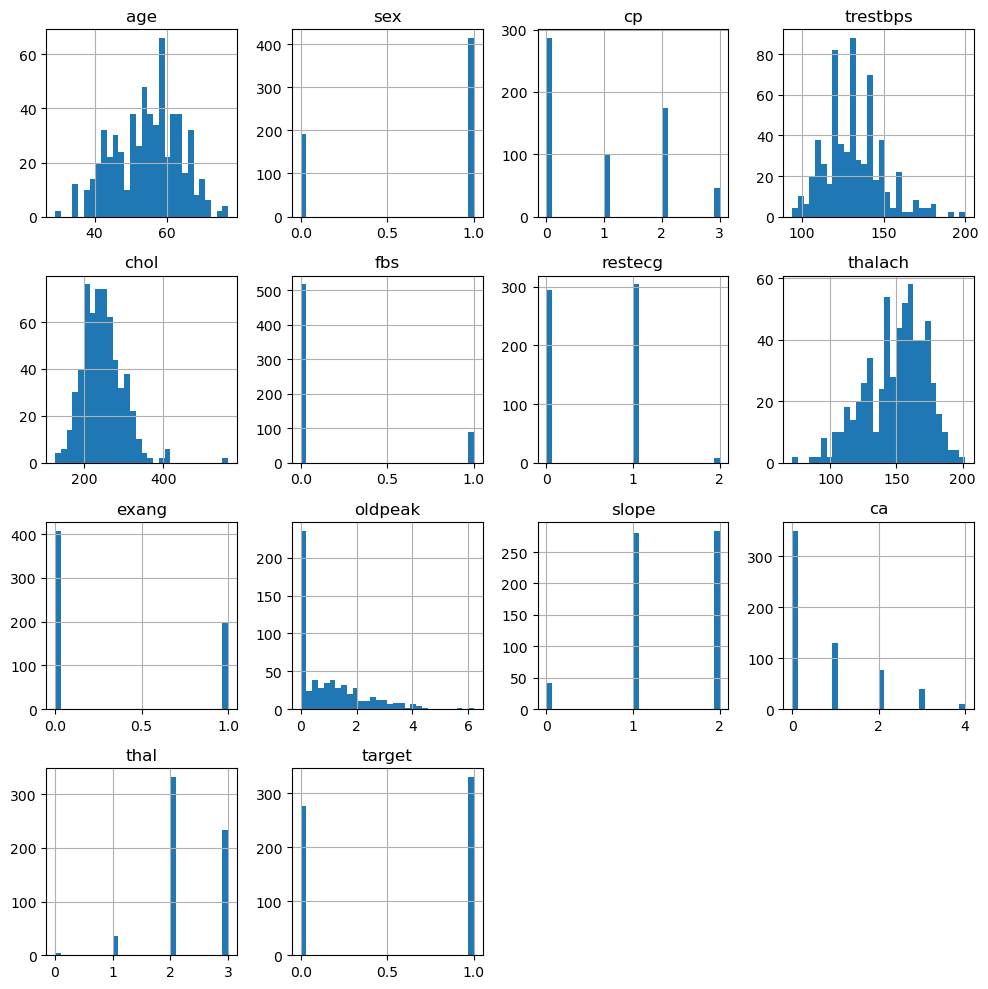

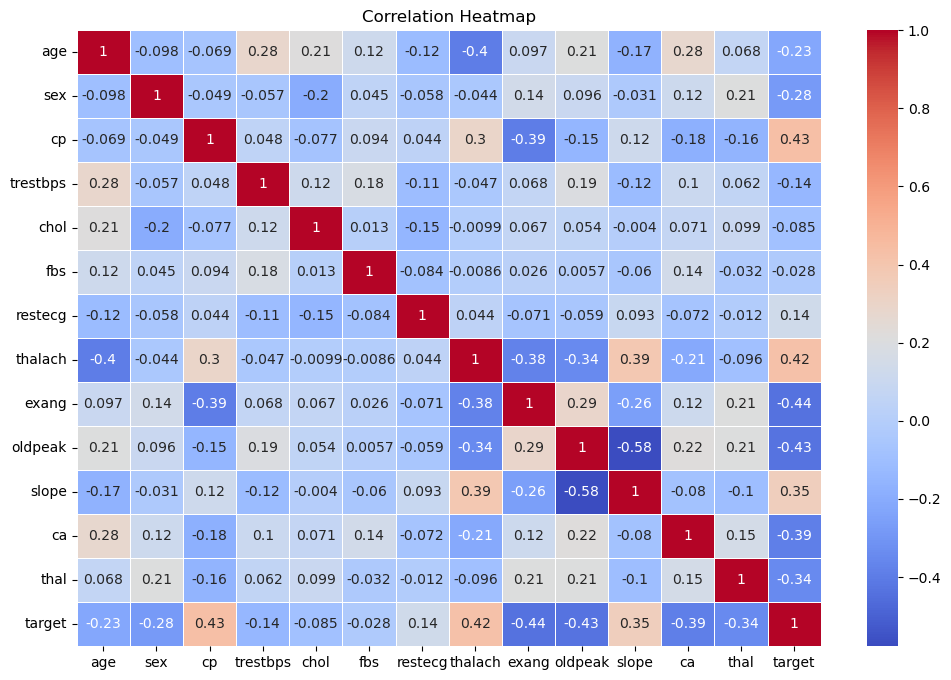

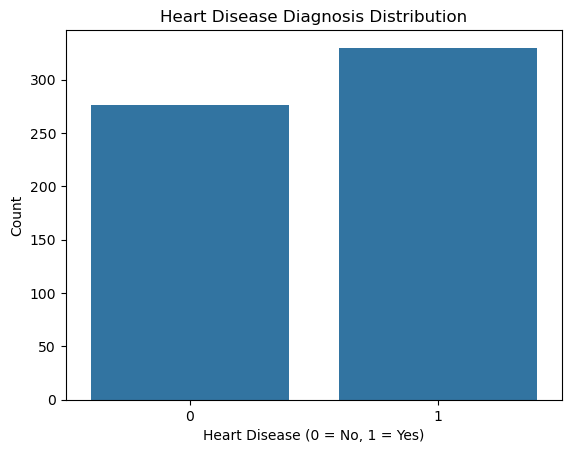

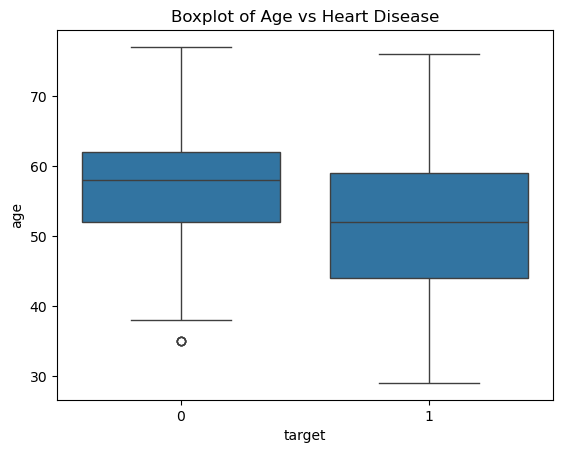

In [6]:
# Set the figure size for plots
plt.figure(figsize=(10, 6))

# Visualize the distribution of each numerical feature
df.hist(bins=30, figsize=(10, 10))
plt.tight_layout()
plt.show()

# Visualize the correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Visualize the target variable distribution (Heart Disease: target column)
sns.countplot(x='target', data=df)
plt.title("Heart Disease Diagnosis Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Boxplot to check outliers in numerical features
sns.boxplot(x='target', y='age', data=df)
plt.title('Boxplot of Age vs Heart Disease')
plt.show()


In [8]:
# Data Cleaning and Preprocessing

# There are no missing values in the dataset, but let's ensure to fill any missing values if they arise
# Fill missing values for numerical columns (if any)
df['chol'].fillna(df['chol'].median(), inplace=True)
df['thalach'].fillna(df['thalach'].median(), inplace=True)

# Convert categorical variables into numerical values using encoding
# Since 'sex' column is already numeric (0 and 1), no need to map it again
# Ensure all columns that need encoding are handled
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})  # Optional: to make it human-readable for analysis
df['sex'] = df['sex'].map({'female': 0, 'male': 1})  # Re-encode 'sex' as binary (if required)

# Map 'cp', 'restecg', 'thal' into numerical values using label encoding or one-hot encoding
df = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Drop unnecessary columns (like 'Id' if it exists)
df.drop(['Id'], axis=1, inplace=True, errors='ignore')

# Display the cleaned dataset
print(df.head())

# Check for any missing values again after the cleaning
print(df.isnull().sum())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  target  \
0   48    1       130   256    1      150      1      0.0      2   2       0   
1   61    1       148   203    0      161      0      0.0      2   1       0   
2   44    0       118   242    0      149      0      0.3      1   1       1   
3   47    1       110   275    0      118      1      1.0      1   1       0   
4   56    1       120   193    0      162      0      1.9      1   0       1   

    cp_1   cp_2   cp_3  restecg_1  restecg_2  thal_1  thal_2  thal_3  
0  False  False  False      False      False   False   False    True  
1  False  False  False       True      False   False   False    True  
2  False   True  False       True      False   False    True   False  
3  False  False  False      False      False   False    True   False  
4  False  False   True      False      False   False   False    True  
age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exa

C:\Users\milto\AppData\Local\Temp\ipykernel_19076\2458064788.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(df['chol'].median(), inplace=True)
C:\Users\milto\AppData\Local\Temp\ipykernel_19076\2458064788.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [9]:
# Prepare the Features and Target Variable

# Define features (X) and target (y)
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']  # Target column (Heart Disease: 0 = No, 1 = Yes)

# Check the class distribution of the target variable
print("Class distribution of target variable:", y.value_counts())

# Optionally: Check for any imbalance and balance if necessary (e.g., with SMOTE, or class weighting)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the dimensions of the data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Apply feature scaling (if necessary, especially for models like KNN or Logistic Regression)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, you can proceed with training your model (e.g., Logistic Regression, Random Forest, etc.)

Class distribution of target variable: target
1    330
0    276
Name: count, dtype: int64
(484, 18) (122, 18) (484,) (122,)


In [10]:
# Model Training

# Initialize and train a logistic regression model using scaled features
model = LogisticRegression(max_iter=1000, solver='lbfgs')  # Increased max_iter for convergence
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)  # Use the scaled test set

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.819672131147541
Confusion Matrix:
[[36 14]
 [ 8 64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        50
           1       0.82      0.89      0.85        72

    accuracy                           0.82       122
   macro avg       0.82      0.80      0.81       122
weighted avg       0.82      0.82      0.82       122

